<div style="font-family: 'Georgia', serif; background: linear-gradient(to right, #D3D3D3, #87CEFA); padding: 20px; border-radius: 15px; box-shadow: 10px 10px 5px grey; color: gray;">
    <h2 style="font-size: 22px;">Course: Pattern Recognition</h2>
    <h3 style="font-size: 20px;">Project: Email Spam Classification using Naive Bayes</h3>
    
</div>


<div style="font-family: 'Georgia', serif; background: linear-gradient(to right, #D3D3D3, #87CEFA); padding: 20px; border-radius: 15px; box-shadow: 10px 10px 5px grey; color: gray;">
    <h2 style="font-size: 22px;">1. Importing libraries </h2>
    
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  naive_bayes,svm,tree,model_selection,base,preprocessing,feature_extraction, metrics
from sklearn import   

<div style="font-family: 'Georgia', serif; background: linear-gradient(to right, #D3D3D3, #87CEFA); padding: 20px; border-radius: 15px; box-shadow: 10px 10px 5px grey; color: gray;">
    <h2 style="font-size: 22px;">2. Uploading the dataset </h2>
    
</div>


In [2]:
df = pd.read_csv("combined_data.csv")


<div style="font-family: 'Georgia', serif; background: linear-gradient(to right, #D3D3D3, #87CEFA); padding: 20px; border-radius: 15px; box-shadow: 10px 10px 5px grey; color: gray;">
    <h2 style="font-size: 22px;">3.EDA </h2>
    
</div>
 

In [3]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
df.tail()

,label,text
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...
83447,1,get the most out of life ! viagra has helped m...


In [5]:
df.shape

(83448, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [22]:
labels = { 1 : "Spam",0 : "Not Spam"}
label_counts = df['label'].value_counts()
print(label_counts)

1    43910
0    39538
Name: label, dtype: int64


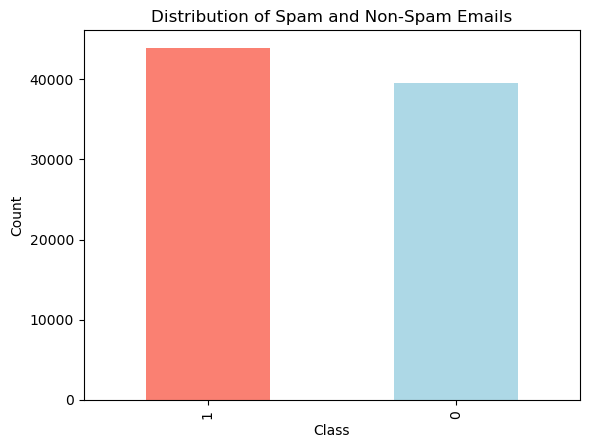

In [23]:
df['label'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [24]:
df.groupby(df['label']).describe()

text                                                               
       count unique                                                top freq
label                                                                      
0      39538  39538   computer connection from cnn com wednesday es...    1
1      43910  43910  ounce feather bowl hummingbird opec moment ala...    1

In [25]:
df.isna().sum()

label    0
text     0
dtype: int64

<div style="font-family: 'Georgia', serif; background: linear-gradient(to right, #D3D3D3, #87CEFA); padding: 20px; border-radius: 15px; box-shadow: 10px 10px 5px grey; color: gray;">
    <h2 style="font-size: 22px;">4. Preprocessing </h2>
    
</div>


In [78]:
print(f"Number of duplicates : {np.sum(df.duplicated())}")


Number of duplicates : 0


In [27]:
print(df.shape)

(83448, 2)


In [28]:
X = df.drop('label', axis = 1).values
y = df['label'].values
print(X.shape, y.shape)

(83448, 1) (83448,)


In [29]:
print(X)

[['ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage']
 ["wulvob get your medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt have you ever stopped to wonder how much an average man pays for his mediecines ap painkillers drugs to improve the quality of life weight reducing tablets and many more escapenumber what's worse the same mediucine costs a lot more if it is branded rfwur are you intrested so http dmvrwm remunerativ net dfuaeirxygiq visit our website escapenumber"]
 [" computer connection from cnn

In [30]:
# Count Vectorization ( Converting text into features ) Count of each word 
vectorizer = feature_extraction.text.CountVectorizer()

In [31]:
X = vectorizer.fit_transform(X.reshape(-1))  
print("Total number of features :", len(vectorizer.get_feature_names_out()))

Total number of features : 310813


In [32]:
print(X.shape)

(83448, 310813)


In [33]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20, stratify = y)

print(X_train.shape, X_test.shape)


(66758, 310813) (16690, 310813)


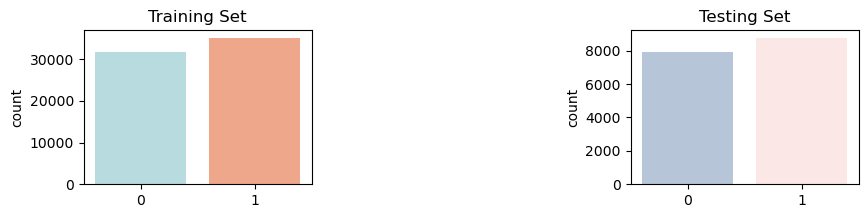

In [34]:
plt.figure(figsize = (10, 2))

# For Training Set
custom_palette = ["powderblue", "lightsalmon"]
plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.countplot(x = y_train, palette=custom_palette)

# For Testing Set
custom_color = ["lightsteelblue", "mistyrose"] 
plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.countplot(x = y_test, palette=custom_color)

plt.show()


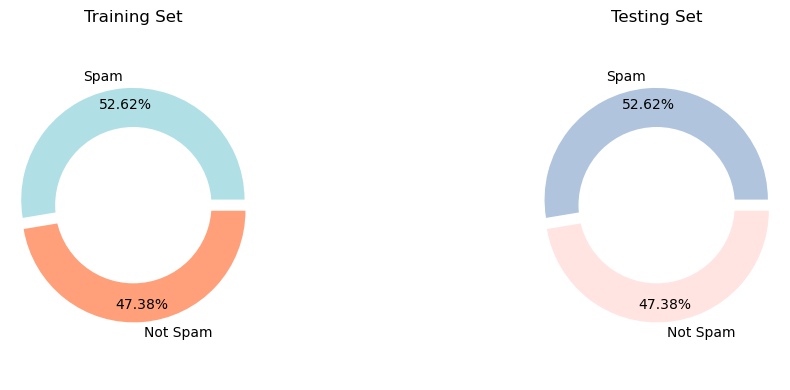

In [35]:
plt.figure(figsize = (8, 4))

# For Training Set
custom_palette = ["powderblue", "lightsalmon"]
plt.subplot(1, 3, 1)
plt.title("Training Set")
plt.pie(pd.Series(y_train).value_counts(), colors=custom_palette, labels=labels.values(), autopct="%.2f%%", pctdistance=0.85, explode=[0.05]*len(pd.Series(y_test).value_counts()))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()

# For Testing Set
custom_color = ["lightsteelblue", "mistyrose"]
plt.subplot(1, 3, 3)
plt.title("Testing Set")
plt.pie(pd.Series(y_test).value_counts(), colors=custom_color, labels=labels.values(), autopct="%.2f%%", pctdistance=0.85, explode=[0.05]*len(pd.Series(y_test).value_counts()))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()

plt.show()


<div style="font-family: 'Georgia', serif; background: linear-gradient(to right, #D3D3D3, #87CEFA); padding: 20px; border-radius: 15px; box-shadow: 10px 10px 5px grey; color: gray;">
    <h2 style="font-size: 22px;">5. Building Model and Training </h2>
    
</div>


In [57]:
svc = svm.LinearSVC()  
nb = naive_bayes.MultinomialNB()
desc_tree = tree.DecisionTreeClassifier() 

models = [svc, nb, desc_tree]
scores = []
def evaluate(model):
    cross_val_scores = model_selection.cross_val_score(base.clone(model), X_train, y_train, cv=5)
    print(f"\nCross Validation Scores for model {type(model).__name__} : ")
    print(cross_val_scores, cross_val_scores.mean())
    scores.append(cross_val_scores.mean())


for model in models:
    evaluate(model)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Cross Validation Scores for model LinearSVC : 
[0.980003   0.98180048 0.98045237 0.97917759 0.97910269] 0.9801072240904528

Cross Validation Scores for model MultinomialNB : 
[0.97633313 0.97648292 0.97498502 0.97258632 0.97483335] 0.975044149485754

Cross Validation Scores for model DecisionTreeClassifier : 
[0.95978131 0.96247753 0.96045536 0.96239982 0.95902929] 0.9608286613107614


In [58]:
model = models[np.argmax(scores)]

print(f"Best Model : {model}")

model.fit(X_train, y_train)

Best Model : LinearSVC()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [59]:
y_train_pred = model.predict(X_train)

In [66]:
y_test_pred = model.predict(X_test)

In [69]:
train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred,y_test)
print("Train accuracy : ", train_accuracy)
print("Train accuracy : ", test_accuracy )

Train accuracy :  0.9997153899158153
Train accuracy :  0.9802875973636909


In [71]:

df = pd.DataFrame({'Actual': y_test[:10], 'Predicted': y_test_pred[:10]})
df

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


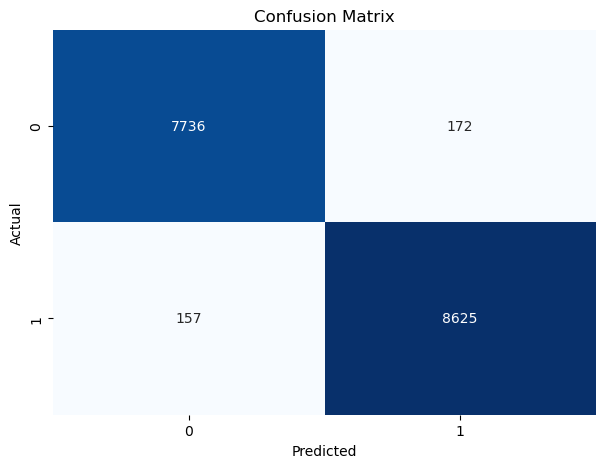

In [72]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(7, 5)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [73]:
# Classification Report
clf_report = metrics.classification_report(y_test, y_test_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7908
           1       0.98      0.98      0.98      8782

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



<div style="font-family: 'Georgia', serif; background: linear-gradient(to right, #D3D3D3, #87CEFA); padding: 20px; border-radius: 15px; box-shadow: 10px 10px 5px grey; color: gray;">
    <h2 style="font-size: 22px;">7. Testing Model </h2>
    
</div>


In [77]:
test_sentences = np.array([
    "Your invoice for last month's purchase is attached.",
    "You have won a $1000 gift card, click here to claim now!",
    "Your bank account has been charged $99.99 for your monthly subscription.",
    "We miss you! Get 50% off on your next purchase.",
    "Your friend has invited you to join this amazing app.",
    "You have received a payment of $500. Click here to view.",
    "Your password reset link is here.",
    "You have new matches waiting on our dating app.",
    "Your credit score has changed. Click here to view your report.",
    "Get rid of belly fat with this one weird trick.",
    "Your tax refund is now available. Click here to claim.",
    "You have unread messages from your colleagues.",
    "Earn $7000 a month from home. Click here to learn how.",
    "Your order has been shipped. Track your shipment here.",
    "Get lifetime access to our exclusive content for just $10.",
    "You have won a free membership to our gym."
])

vectorized_test = vectorizer.transform(test_sentences)
predictions = model.predict(vectorized_test)
df = pd.DataFrame({'Sentence': test_sentences, 'Prediction': predictions})
df

,Sentence,Prediction
0,Your invoice for last month's purchase is atta...,0
1,"You have won a $1000 gift card, click here to ...",1
2,Your bank account has been charged $99.99 for ...,1
3,We miss you! Get 50% off on your next purchase.,1
4,Your friend has invited you to join this amazi...,1
5,You have received a payment of $500. Click her...,1
6,Your password reset link is here.,0
7,You have new matches waiting on our dating app.,1
8,Your credit score has changed. Click here to v...,1
9,Get rid of belly fat with this one weird trick.,1
